# Lecture 5: Supervised Learning - Classification: Accuracy Metrics

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Supervised Learning - Classification: Logistic Regression
- Confusion Matrix
- Accuracy, Precision, Recall/Sensitivity/True Positive Rate, F1 score, False Positive Rate
- ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve
- Classification report

#### References:
[1] Machine Learning Fundamentals: The Confusion Matrix - https://www.youtube.com/watch?v=Kdsp6soqA7o&ab_channel=StatQuestwithJoshStarmer
<br>[2] Machine Learning Fundamentals: Sensitivity and Specificity: https://www.youtube.com/watch?v=sunUKFXMHGk&ab_channel=StatQuestwithJoshStarmer
<br>[3] ROC and AUC, Clearly Explained! https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer
<br>[4] Machine Learning Fundamentals: Bias and Variance: https://www.youtube.com/watch?v=EuBBz3bI-aA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=5&ab_channel=StatQuestwithJoshStarmer
<br>[5] StatQuest: Logistic Regression - https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer
<br>[6] Logistic Regression Details Pt1: Coefficients: https://www.youtube.com/watch?v=vN5cNN2-HWE&ab_channel=StatQuestwithJoshStarmer
<br>[7] Logistic Regression Details Pt 2: Maximum Likelihood: https://www.youtube.com/watch?v=BfKanl1aSG0&t=163s&ab_channel=StatQuestwithJoshStarmer
<br>[8] Machine Learning Tutorial Python - 8: Logistic Regression (Binary Classification): https://www.youtube.com/watch?v=zM4VZR0px8E&ab_channel=codebasics
<br>[9] Maximum Likelihood, clearly explained!!!: https://www.youtube.com/watch?v=XepXtl9YKwc&ab_channel=StatQuestwithJoshStarmer

#### Import required libraries

In [43]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 20
# pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data
Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

In [44]:
df = pd.read_csv("Churn.csv")

display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,...,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,...,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,...,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,...,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,...,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [45]:
print(df.shape)

(3333, 21)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Data Preprocessing

In [47]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [48]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Target variable 

In [50]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

#### Feature and target variable separation

In [51]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Train test separation

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


In [66]:
y_test["Churn"].value_counts()

0    855
1    145
Name: Churn, dtype: int64

#### Training: Logistic Regression

In [53]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

#### Prediction

In [54]:
y_pred = model.predict(X_test)
# print(y_pred)

In [55]:
# model.predict_proba(X_test)

#### Prediction Comparison with the test data

In [56]:
y_test["Churn_probability"] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test["Churn_predicted"] = y_pred

display(y_test.head())

,Churn,Churn_probability,Churn_predicted
68,0,0.35,0
1653,1,0.24,0
1716,0,0.12,0
3251,0,0.16,0
2406,0,0.10,0


In [57]:
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_test =  (1000, 17)
Shape of y_test =  (1000, 3)


In [59]:
test = pd.concat([X_test, y_test], axis=1)

print(test.shape)
display(test.head(10))

(1000, 20)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,Churn_probability,Churn_predicted
68,126,0,211.6,216.9,153.5,7.8,1,0,0,70,35.97,80,18.44,60,6.91,1,2.11,0,0.35,0
1653,93,0,131.4,219.7,155.7,11.1,1,1,0,78,22.34,106,18.67,103,7.01,2,3.00,1,0.24,0
1716,36,25,152.8,242.8,147.4,9.1,1,0,1,110,25.98,67,20.64,74,6.63,2,2.46,0,0.12,0
3251,88,0,274.6,161.1,194.4,9.2,2,0,0,105,46.68,121,13.69,123,8.75,4,2.48,0,0.16,0
2406,81,0,145.6,287.9,181.7,9.2,2,0,0,59,24.75,131,24.47,121,8.18,4,2.48,0,0.10,0
793,45,0,112.8,218.8,240.2,9.0,2,0,0,108,19.18,120,18.60,106,10.81,3,2.43,0,0.06,0
1029,116,0,201.8,231.5,226.1,16.5,0,0,0,82,34.31,95,19.68,130,10.17,5,4.46,0,0.08,0
1943,125,0,168.6,175.6,243.3,10.9,0,0,0,99,28.66,107,14.93,92,10.95,7,2.94,0,0.04,0
1161,40,0,170.7,179.1,281.9,8.2,3,1,0,55,29.02,108,15.22,89,12.69,9,2.21,0,0.41,0
2837,75,0,203.3,228.9,222.2,14.3,1,0,0,70,34.56,97,19.46,118,10.00,3,3.86,0,0.19,0


#### Confusion Matrix

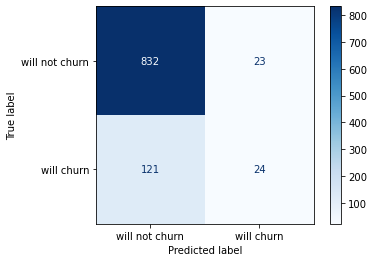

In [62]:
plot_confusion_matrix(model,
                      X_test,
                      y_test["Churn"],
                      display_labels = ["will not churn", "will churn"],
                      cmap = "Blues")

plt.show()

In [63]:
confusion_matrix_ = confusion_matrix(y_test["Churn"],
                                     y_test["Churn_predicted"])

print(confusion_matrix_)

[[832  23]
 [121  24]]


In [64]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  832
False Negatives =  121
False Positives =  23
True Positives =  24


#### Accuracy

In [65]:
accuracy = (TN+TP)/(TN+TP+FP+FN)
print(accuracy)

0.856


#### Precision, Recall/Sensitivity/True Positive Rate, F1 score

**precision:**
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

**recall:**
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

**f1 score:**
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**support:**
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [73]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2) #predicted class 1
recall = np.round(TP/(TP+FN), 2) #actual class 1
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1_score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['Churn_predicted']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['Churn_predicted']), 2)

f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['Churn_predicted']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1_score = ", f1_score__)

Calculated __________________________
Precision =  0.51
Recall =  0.17
f1_score =  0.26

Scikit-Learn ________________________
Precision =  0.51
Recall =  0.17
f1_score =  0.25


#### Classification report

In [69]:
classification_report_ = classification_report(y_test["Churn"],
                                               y_test["Churn_predicted"])
print(classification_report_)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       855
           1       0.51      0.17      0.25       145

    accuracy                           0.86      1000
   macro avg       0.69      0.57      0.59      1000
weighted avg       0.82      0.86      0.82      1000

